In [2]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import pydotplus

# 花萼长度、花萼宽度，花瓣长度，花瓣宽度
iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
path = '../dataset/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x = data[range(4)]
y = pd.Categorical(data[4]).codes
# 为了可视化，仅使用前两列特征
x = x.iloc[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=1)
print y_test.shape

# 决策树参数估计
# min_samples_split = 10：如果该结点包含的样本数目大于10，则(有可能)对其分支
# min_samples_leaf = 10：若将某结点分支后，得到的每个子结点样本数目都大于10，则完成分支；否则，不进行分支
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
y_test_hat = model.predict(x_test)  # 测试数据

(45,)


In [4]:
# 保存
# dot -Tpng my.dot -o my.png
# 1、输出
with open('iris.dot', 'w') as f:
    tree.export_graphviz(model, out_file=f)
# 2、给定文件名
# tree.export_graphviz(model, out_file='iris1.dot')
# 3、输出为pdf格式
dot_data = tree.export_graphviz(model, out_file=None, feature_names=iris_feature_E, class_names=iris_class,
                                filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris.pdf')
f = open('iris.png', 'wb')
f.write(graph.create_png())
f.close()

(2500, 2)
(2500,)
[0 0 0 ..., 2 2 2]
[[0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 [0 0 0 ..., 1 1 1]
 ..., 
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]
 [0 0 0 ..., 2 2 2]]


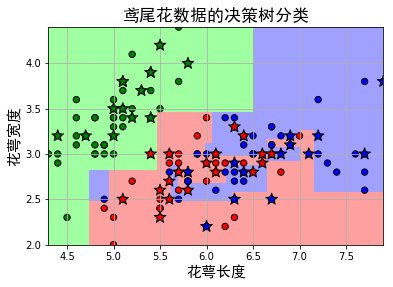

[0 1 2 0 2 2 1 0 0 2 2 0 1 2 1 0 2 1 0 0 1 0 2 0 2 1 0 0 1 1 2 2 2 2 1 0 1
 0 2 1 2 0 1 1 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
准确度: 62.22%


In [7]:
# 画图
N, M = 50, 50  # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
print x_show.shape

# # 无意义，只是为了凑另外两个维度
# # 打开该注释前，确保注释掉x = x[:, :2]
# x3 = np.ones(x1.size) * np.average(x[:, 2])
# x4 = np.ones(x1.size) * np.average(x[:, 3])
# x_test = np.stack((x1.flat, x2.flat, x3, x4), axis=1)  # 测试点

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
print y_show_hat.shape
print y_show_hat
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
print y_show_hat
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0], x_test[1], c=y_test.ravel(), edgecolors='k', s=150, zorder=10, cmap=cm_dark, marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=40, cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=15, fontproperties=fontproperties)
plt.ylabel(iris_feature[1], fontsize=15, fontproperties=fontproperties)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(True)
plt.title(u'鸢尾花数据的决策树分类', fontsize=17, fontproperties=fontproperties)
plt.show()

# 训练集上的预测结果
y_test = y_test.reshape(-1)
print y_test_hat
print y_test
result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
acc = np.mean(result)
print '准确度: %.2f%%' % (100 * acc)

[False False False  True  True False  True  True  True  True False  True
  True False False  True False False  True  True False False False  True
  True False False  True False  True False  True False  True  True  True
 False  True False  True  True  True  True  True False]
1  错误率: 44.44%
2  错误率: 40.00%
3  错误率: 20.00%
4  错误率: 24.44%
5  错误率: 24.44%
6  错误率: 28.89%
7  错误率: 37.78%
8  错误率: 37.78%
9  错误率: 37.78%
10  错误率: 37.78%
11  错误率: 37.78%
12  错误率: 37.78%
13  错误率: 35.56%
14  错误率: 37.78%


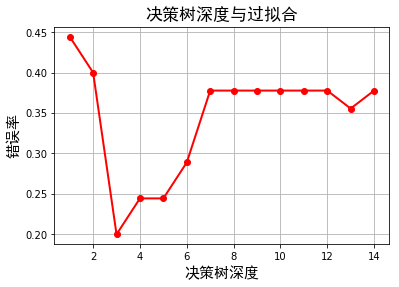

In [8]:
# 过拟合：错误率
depth = np.arange(1, 15)
err_list = []
for d in depth:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=d)
    clf.fit(x_train, y_train)
    y_test_hat = clf.predict(x_test)  # 测试数据
    result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
    if d == 1:
        print result
    err = 1 - np.mean(result)
    err_list.append(err)
    # print d, ' 准确度: %.2f%%' % (100 * err)
    print d, ' 错误率: %.2f%%' % (100 * err)
plt.figure(facecolor='w')
plt.plot(depth, err_list, 'ro-', lw=2)
plt.xlabel(u'决策树深度', fontsize=15, fontproperties=fontproperties)
plt.ylabel(u'错误率', fontsize=15, fontproperties=fontproperties)
plt.title(u'决策树深度与过拟合', fontsize=17, fontproperties=fontproperties)
plt.grid(True)
plt.show()

特征：   花萼长度  +  花萼宽度 	预测正确数目： 123 	准确率: 82.00%
特征：   花萼长度  +  花瓣长度 	预测正确数目： 145 	准确率: 96.67%
特征：   花萼长度  +  花瓣宽度 	预测正确数目： 144 	准确率: 96.00%
特征：   花萼宽度  +  花瓣长度 	预测正确数目： 143 	准确率: 95.33%
特征：   花萼宽度  +  花瓣宽度 	预测正确数目： 145 	准确率: 96.67%
特征：   花瓣长度  +  花瓣宽度 	预测正确数目： 147 	准确率: 98.00%


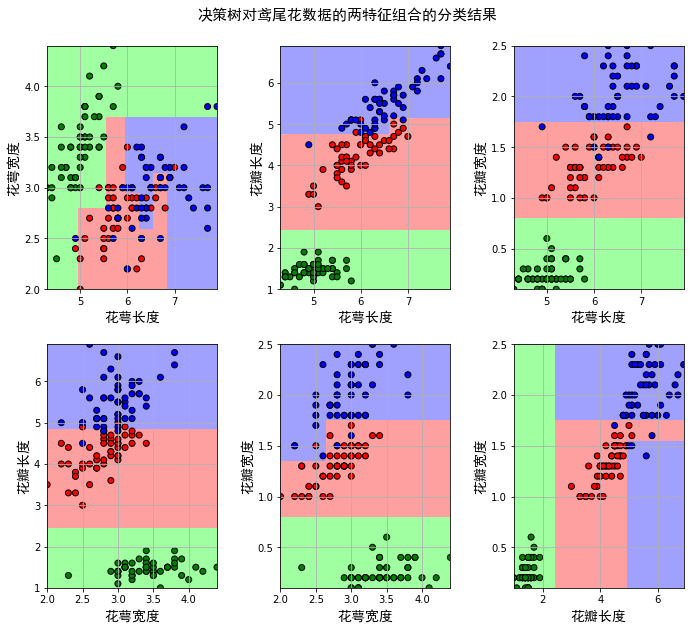

In [9]:
# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
data = pd.read_csv(path, header=None)
x_prime = data[range(4)]
y = pd.Categorical(data[4]).codes

feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
plt.figure(figsize=(10, 9), facecolor='#FFFFFF')
for i, pair in enumerate(feature_pairs):
    # 准备数据
    x = x_prime[pair]

    # 决策树学习
    clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
    clf.fit(x, y)

    # 画图
    N, M = 500, 500  # 横纵各采样多少个值
    x1_min, x2_min = x.min()
    x1_max, x2_max = x.max()
    t1 = np.linspace(x1_min, x1_max, N)
    t2 = np.linspace(x2_min, x2_max, M)
    x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
    x_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

    # 训练集上的预测结果
    y_hat = clf.predict(x)
    y = y.reshape(-1)
    c = np.count_nonzero(y_hat == y)  # 统计预测正确的个数
    print '特征：  ', iris_feature[pair[0]], ' + ', iris_feature[pair[1]],
    print '\t预测正确数目：', c,
    print '\t准确率: %.2f%%' % (100 * float(c) / float(len(y)))

    # 显示
    cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
    y_hat = clf.predict(x_test)  # 预测值
    y_hat = y_hat.reshape(x1.shape)  # 使之与输入的形状相同
    plt.subplot(2, 3, i + 1)
    plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
    plt.scatter(x[pair[0]], x[pair[1]], c=y, edgecolors='k', cmap=cm_dark)  # 样本
    plt.xlabel(iris_feature[pair[0]], fontsize=14, fontproperties=fontproperties)
    plt.ylabel(iris_feature[pair[1]], fontsize=14, fontproperties=fontproperties)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.grid()
plt.suptitle(u'决策树对鸢尾花数据的两特征组合的分类结果', fontsize=18, fontproperties=fontproperties)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()